<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_15_Convolution_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

# visualization
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

# Convolution with Conv2 in PyTorch

## Create a class instance

In [3]:
# Create a conv2d class instance with parameters defined below
inChans = 3 # RGB
outChans = 15 # 15 feature map
krnSize = 5 # Kernel Size (odd)
stride = 1  # No Stride
padding = 0  # not adding any padding

# Now create the instance as follows (cf nn.Linear)
# This is like the first convolutional layer
c = nn.Conv2d(inChans, outChans, krnSize, stride, padding)

# Print it out
print(c)

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))


In [5]:
# Check out the weight tensor
print(f"The size of weights: {c.weight.shape}")
print()
print(f"Size of Bias: {c.bias.shape}")
# Each channel has a bias, thus 3 in, 5 out = 15

The size of weights: torch.Size([15, 3, 5, 5])

Size of Bias: torch.Size([15])


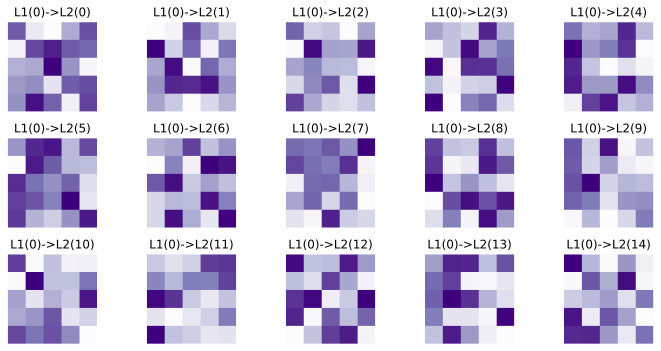

In [6]:
# How do kernels look like: They are small images that can be visualized
# They are initialized randomly
fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap="Purples")
    ax.set_title("L1(0)->L2(%s)"%i)
    ax.axis("off")

plt.tight_layout()
plt.show()

## Convolve with an Image

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


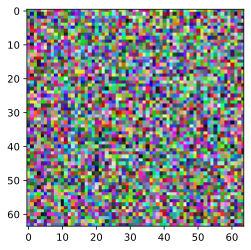

In [10]:
# Definition of image size (N, RGB, Width, Height)
imsize = (1, 3, 64, 64)

img = torch.rand(imsize)

# PyTorch asks for channels first, Matplotlib asks for channels last!
# Permute tensors for visualization
img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view));

In [ ]:
# Convolve the image with the filter bank (set of outChains kernels)
convRes = c(img)
